<a href="https://colab.research.google.com/github/OlenePeng/Github-Colab/blob/main/QBUS6840_2024S2_Tutorial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>QBUS6840 - Predictive Analytics - 2024S2 </h1></center>

# Tutorial 2 - Working with Time-Series II

### Objectives: Get familiar with Time Series data manipulation


1. Random number in Numpy
2. How to shift a time series
3. How to retrieve data from a DataFrame

In our last tutorial, we have learnt the data preprocessing in Time Series, e.g. loading the dataset from a csv file, indexing the data, and visualizing the data. In this week, we will go one step further with more data manipulation techniques.

Let's continue with step 5 in the last tutorial. At the end of the task, you got a plot of the time series showing number of passengers in different time points.

In [138]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/6840/tut2"

os.chdir(path)
os.listdir(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Lecture02_Example00.py',
 'Lecture02_Example01.py',
 'Lecture02_Example02.py',
 'beer.txt',
 'AustralianVisitors.csv',
 '.DS_Store',
 'drinks.csv',
 'AirPassengers.csv',
 'docs.png',
 'question-mark-button.png',
 'QBUS6840 2024S2 - Tutorial 02.ipynb',
 '.ipynb_checkpoints',
 'gpd_per_capita.csv']

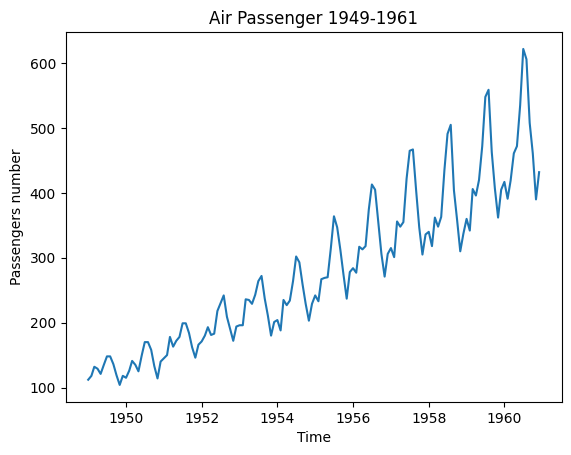

In [139]:
# Import some external libraries
import pandas as pd                # For data manipulation
import matplotlib.pyplot as plt    # For visualization
import numpy as np                 # For linear algebra

# Load data and set the Month column as the index column
data_time = pd.read_csv('AirPassengers.csv')              # Read data from a csv file
data_time['Month']=pd.to_datetime(data_time['Month'])     # Convert the data in the Month column to datetime
#data_time.set_index('Month', inplace=True)                # Indexing the DataFrame by the Month column
data_time = data_time.set_index('Month', inplace=False) # 这样不会改变原来的数据
data_time.head()

# Extract the Passengers column and plot the time series
ts = data_time['Passengers']

# Create a figure and plot the time series
plt.figure()                          # Create an empty figure
# ts也有原始的index
plt.plot(ts)                          # Implicitly use time indexes for x data
plt.title('Air Passenger 1949-1961')  # Add title to the plot
plt.xlabel('Time')                    # Add label to the x-axis
plt.ylabel('Passengers number')       # Add label to the y-axis
plt.show()

**Note:** If you don't want to see the warning about the implicit data time converter of Pandas, you can explicitly add the values for x-axis as `plt.plot(ts.index,ts)`, or add this line anywhere before calling the `plot()` function
```Python
pd.plotting.register_matplotlib_converters()
```

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Can you rotate xticks a 70 degree angle? **Hint:** using `plt.xticks()` with `rotation=70`
- Can you change the figure size to *width=15* and *height=6*? **Hint:** using `plt.figure()` with argument `figsize=(15,6)`

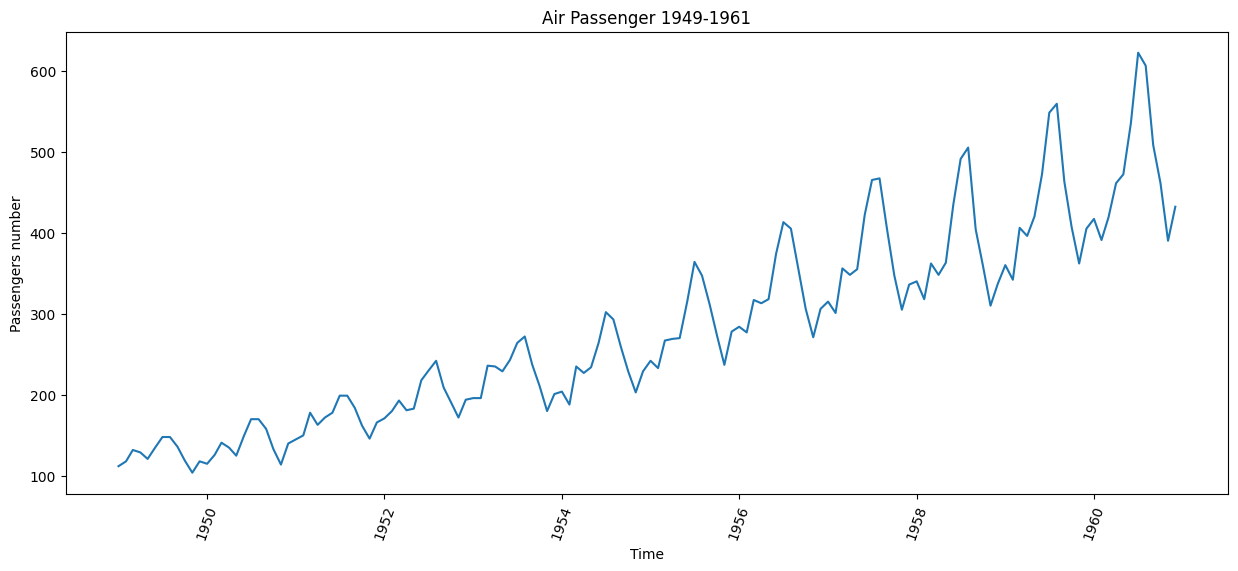

In [13]:
# Create a figure with the desired size
plt.figure(figsize=(15,6))  # Set the figure size to width=15 and height=6

# Plot the time series
plt.plot(ts)

# Add title and labels
plt.title('Air Passenger 1949-1961')
plt.xlabel('Time')
plt.ylabel('Passengers number')

# Rotate the xticks by 70 degrees
plt.xticks(rotation=70)

# Show the plot
plt.show()

## 1. Random numbers and random seed

**Note:** <font color='red'>The main purpose of this section is to introduce the concepts of random number, random seed and how to use `numpy` to generate random numbers in a sample case where we may need to use random numbers. The section does not imply that we always have to add random numbers to time series data to make the data more realistic. </font>

You may notice that the above plot is neat and clean. However, sometimes, this kind of data may not good for the use of time series forecasting due to the lack of **generalization**. One of practices could potentially mitigate this issue is to add random numbers (noises) to the dataset as a form of **regularization**, and therefore, improving the **generalization** of the model.

Here, we will add random numbers, or simulated/synthetic noise, to our original data. By doing this, we will use `numpy` library to generate random numbers and add those numbers to the air passenger dataset.

In general, when you use random numbers in your program, every time when you run your program, it will give different results, causing trouble to validate the outcome. To make sure you can obtain the "same" results for all runs, you can start by "seeding" numpy's random number generator (RNG). Seeding can guarantee that each time you run the script the same random data will be produced. You can use any number as the parameter to the seed function. In this tutorial, let's chose $0$.

In [14]:
# Fixing random state for reproducibility
np.random.seed(0)

Then generate some random data that is the same length as the Air Passengers data:

In [15]:
# Create a vector of random numbers with the same length as the ts series
random_data = np.random.randn(len(ts))
print(random_data)

# Set the parameters
#mean = 32
#std_dev = 4
#size = 1000  # Number of samples to generate (adjust as needed)

# Generate random samples from the normal distribution
#x = np.random.normal(loc=mean, scale=std_dev, size=size)


[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

Then add the following code to plot the data. We use a scale factor to control the impact of the simulated noise to the original data.  

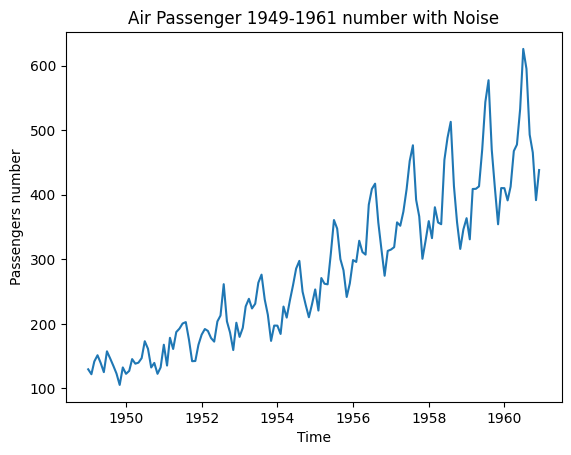

In [16]:
# Add random noise to all data points
scale = 10
ts_noise = ts + (random_data * scale)

# Plot the noisy data and make the plot more informative
plt.figure()
plt.plot(ts_noise.index,ts_noise)
plt.title('Air Passenger 1949-1961 number with Noise')  # Add title to the plot
plt.xlabel('Time')                                      # Add label to the x-axis
plt.ylabel('Passengers number')                         # Add label to the y-axis
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What is the length of `ts_noise`?
--The length of ts_noise is the same as the length of ts, which is the original time series.
- What will happen to `ts_noise` when `scale` is too big or too small?
-- When scale is too big:

Increased Noise: A larger scale factor means that the random noise added to ts will be more significant. This can lead to larger fluctuations and make the noisy time series look very different from the original data.
Reduced Clarity: The original trend in the data might become obscured due to the excessive noise.
When scale is too small:

Insufficient Noise: A smaller scale factor means that the noise added is very minor. The ts_noise will closely resemble the original ts and the added noise might not be noticeable.
Less Variation: The differences between ts and ts_noise will be minimal, which might not be helpful if you need to simulate significant variations.
- If you don't run `np.random.seed(0)` at the very beginning, guess what could happen?
-- Without np.random.seed(0):

Different Results Each Time: Not setting a seed means that every time you run the code, the random numbers generated will be different. This results in ts_noise having different noise values each time you run the code.
Inconsistent Output: If you’re trying to reproduce results or compare different runs, the lack of a fixed seed makes it hard to have consistent and comparable results.
With np.random.seed(0):

Reproducibility: Setting a seed ensures that the random numbers generated are the same each time you run the code. This makes the output of ts_noise consistent across different runs, which is useful for debugging and comparing results.

## 2.  Time-shifts

Another common time series-specific operation is shifting of data in time, e.g. lagging or leading. If the time series is stored as a Series object, then we can call the `shift()` method to shift the data. The shifting operation can be specified in multiple frequencies, e.g. different number of lags or leads.

Continue with the last step, here we will shift the data by 6 months ahead as

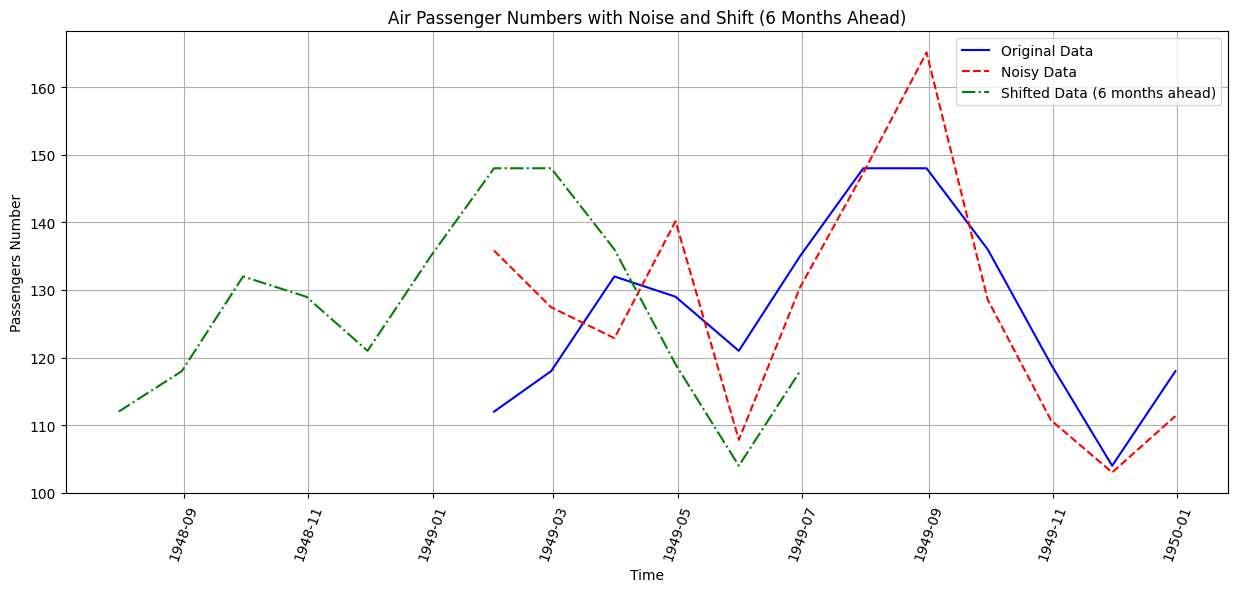

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
dates = pd.date_range(start='1949-01-01', periods=12, freq='M')
ts = pd.Series([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118], index=dates)

# 添加噪声到原始时间序列
scale = 10
random_data = np.random.randn(len(ts))
ts_noise = ts + (random_data * scale)

# 将时间序列数据移动 6 个月
ts_shifted = ts.shift(periods=-6, freq='M')

# 绘制原始数据、噪声数据和移动后的数据
plt.figure(figsize=(15, 6))
plt.plot(ts.index, ts, label='Original Data', color='blue')
plt.plot(ts_noise.index, ts_noise, label='Noisy Data', color='red', linestyle='--')
plt.plot(ts_shifted.index, ts_shifted, label='Shifted Data (6 months ahead)', color='green', linestyle='-.')
plt.title('Air Passenger Numbers with Noise and Shift (6 Months Ahead)')
plt.xlabel('Time')
plt.ylabel('Passengers Number')
plt.legend()
plt.grid(True)
plt.xticks(rotation=70)
plt.show()


In [18]:
data_shift  = ts_noise.shift(6)       # Shift data by 6 months
print(data_shift.head(10))            # Print the first 10 data points
print(data_shift.tail(10))            # Print the last 10 data points

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    129.640523
1949-08-01    122.001572
1949-09-01    141.787380
1949-10-01    151.408932
Name: Passengers, dtype: float64
Month
1960-03-01    469.722948
1960-04-01    411.074618
1960-05-01    354.300839
1960-06-01    410.392492
1960-07-01    410.256673
1960-08-01    391.318306
1960-09-01    412.641539
1960-10-01    467.764333
1960-11-01    477.765908
1960-12-01    532.917012
Name: Passengers, dtype: float64


Then we plot the original noised data and the shifted data within one window by using `plt.subplots()`. Below is an example,

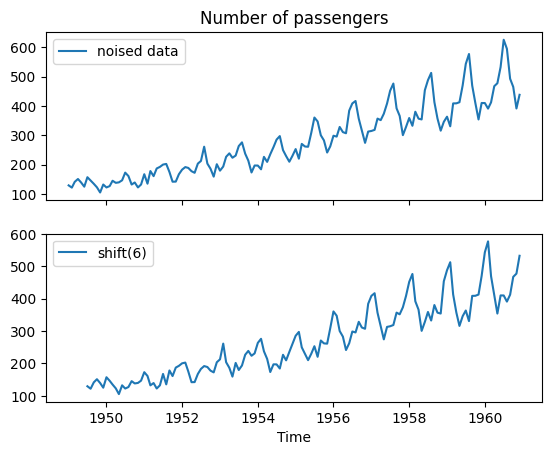

In [19]:
# Plot 2 time series in 2 sub plots： 2row，1colom
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(ts_noise)
ax[1].plot(data_shift)
ax[0].legend(['noised data'], loc=2)     # Adding legend for the 'noise data' series
ax[1].legend(['shift(6)'], loc=2)        # Adding legend for the 'noise data' series
ax[0].set_title('Number of passengers')  # Use subplot 1's title as the shared title
ax[1].set_xlabel('Time')                 # Use subplot 2's xlabel as the shared label for x-axis
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What is the data type of `ax`?
-- ax is a numpy array of AxesSubplot objects. The plt.subplots function returns a figure and an array of Axes objects. In this case, ax is an array because we specified multiple subplots.
- What is `ax[0]`, `ax[1]`?
-- ax[0] is the AxesSubplot object for the first subplot (top subplot).
ax[1] is the AxesSubplot object for the second subplot (bottom subplot).
- Which statement controls the number of rows and columns of the plots?
-- 2 specifies the number of rows.
1 specifies the number of columns.
sharex=True indicates that the x-axes should be shared between the subplots.

- What are the difference among three new data series?
-- In the provided example, the three new data series are:

ts_noise:

Description: The original time series data with added random noise.
Purpose: To simulate a more realistic scenario where data is not perfectly smooth.
ts_shifted:

Description: The original time series data shifted 6 months ahead.
Purpose: To analyze how the data would look if we move it forward in time. Useful for checking temporal relationships and lag effects.
data_shift:

This seems to be a typo or an error in the code. If you meant ts_shifted, then data_shift is actually the same as ts_shifted. If data_shift was intended to be different, it should be defined explicitly.
- Can you modify the `loc` argument and see what happen?
-- The loc argument in legend() controls the location of the legend in the subplot. It can take different values to place the legend at different positions. Here are some common values:

loc=1 (Upper right)
loc=2 (Upper left)
loc=3 (Lower left)
loc=4 (Lower right)

From the above example, we can see `shift(6)` function could shift the data index with 6 points, which is 6 months in our case. This function pushes some of data point off the end of the graph (and leaving NA values at the other end).
   

## 3.  Retrieving data from a DataFrame

`DataFrame` is a special data type of Pandas, designed to store tabular data, e.g. data with rows and columns. Let's take a closer look at what we can do with Pandas `DataFrame`.

Download the **'drinks.csv'** file from the QBUS6840 Canvas site, and use Excel to pre-view the data file so that you understand what information is in the file.

Add the following to your script to import the drinks file:


In [30]:
drinks = pd.read_csv('drinks.csv')   # Read data from a csv file
drinks.head()                        # Print the first 5 rows of the DataFrame

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


To view the information about each column, we use the `info()` method of the DataFrame class

In [31]:
# Print general information about the data
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### 我们可以看到continent有missing value

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Was the information same as what you have observed in Excel?
- What is the data type of the beer servings column?
- How many rows do you have? Is the same number of rows in Excel?

We can easily get some basic statistics about each column by using the `describe()` method of the DataFrame class

In [32]:
# Get summary statistics of numerical columns
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What is the mean of the wine servings column?



To extract a single column, you can index a column by its column name. For example, let's extract the beer servings column and print general description about the beer serving amount:

In [33]:
#['beer_servings','wine_servings'],选择列表
drinks[['beer_servings','wine_servings']].describe()


,beer_servings,wine_servings
count,193.000000,193.000000
mean,106.160622,49.450777
std,101.143103,79.697598
min,0.000000,0.000000
25%,20.000000,1.000000
50%,76.000000,8.000000
75%,188.000000,59.000000
max,376.000000,370.000000


In [34]:
beer_series = drinks['beer_servings']     # Extract the beer_servings column as a Series
                                          # or you can write  beer_series = drinks.beer_servings
print(beer_series.describe())  # Summarize only the beer_servings Series

# Or we can combine 2 steps in a single line of code (nesting)
print(drinks['beer_servings'].describe()) # Summarize only the beer_servings Series

# It is even possible to do like this
print(drinks.beer_servings.describe())

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64
count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64
count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64


**Note:** `drinks['beer_servings']` or `drinks.beer_servings` give you the same result, which is a Series object.

**Note:** A single column of a pandas `DataFrame` is a `Series` object. `Series` has many of the same features of an entire `DataFrame`.

Let's calculate the mean of the beer servings by using the `mean()` method of `Series` objects:

In [35]:
# Get the mean of beer_servings column
beer_series.mean()

106.16062176165804

Pandas allows us to do quite powerful expressions for querying our dataset. For example, you may want to get the countries from Europe. For this dataset try the following:

In [36]:
drinks['continent'] == 'EU'

,continent
0,False
1,True
2,False
3,True
4,False
...,...
188,False
189,False
190,False
191,False


In [37]:
# Extract only rows with 'continent' equals to 'EU'
euro_frame = drinks[drinks['continent'] == 'EU']
euro_frame.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


You can even combine queries. Let's get all countries from Europe with yearly wine servings greater than 300:

In [ ]:
# Extract only rows with 'continent' equals to 'EU' and 'wine_servings' is more than 300
# Use '&' to connect multiple conditional statements
euro_wine_300_frame = drinks[(drinks['continent'] == 'EU') & (drinks['wine_servings'] > 300)]
euro_wine_300_frame

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [39]:
max = drinks[drinks['total_litres_of_pure_alcohol'] == drinks['total_litres_of_pure_alcohol'].max()]

In [40]:
max

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU


<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Which country drinks most alcohol?

In [ ]:
max_frame = drinks[drinks['total_litres_of_pure_alcohol'] == drinks['total_litres_of_pure_alcohol'].max()]
max_frame

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU


Sometimes your dataset may be missing values. In this case `Pandas` has interpreted countries from North America `(continent = NA)` as having `NaN` values. Let's fix that:

In [41]:
# Fill empty values will 'NA' string
# Modify the original data with 'inplace=True'
drinks['continent'].fillna(value='NA', inplace=True)

You can insert your own columns into a `DataFrame`. For example, let's create some columns based off the existing columns:

In [42]:
# Create a new column by adding 'beer_servings', 'spirit_servings' and 'wine_servings' columns
drinks['total_servings'] = drinks.beer_servings + drinks.spirit_servings + drinks.wine_servings

# Create a new column by multiplyig the 'total_litres_of_pure_alcohol' column by 1000
drinks['alcohol_mL'] = drinks.total_litres_of_pure_alcohol * 1000

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


Finally let's see if there's a relationship between beer servings and total litres of pure alcohol.

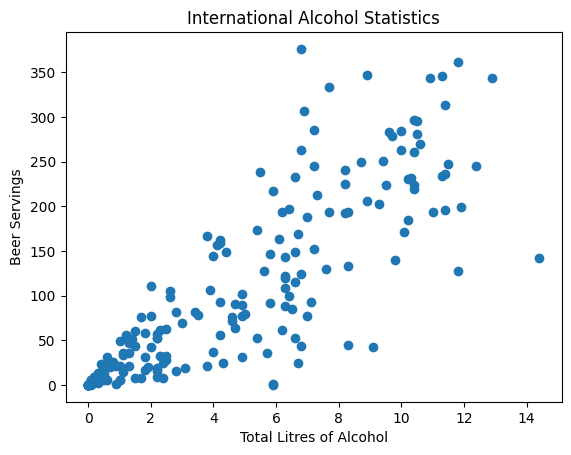

In [43]:
# Scatter plot to visualize the relationship between 'total_litres_of_pure_alcohol' and 'beer_servings'
plt.scatter(drinks['total_litres_of_pure_alcohol'], drinks['beer_servings'])

# Make the plot more informative
plt.xlabel('Total Litres of Alcohol')
plt.ylabel('Beer Servings')
plt.title('International Alcohol Statistics')
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Summarize what you have seen from the plot?

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame </h3></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

# Task

Download 'gdp_per_capita.csv' data file from Canvas and then read the dataset. Now you are required to write a python script to:
1. Read the dataset and store the data in a Dataframe. Use time information as the index of this Dataframe. Note that the time information could be found in the first column (Quarter) of the csv file.
2. Extract the `gpd_per_capita($)` column. Plot the time series and make some comments on the chart.
3. Compute and plot the series of quarterly changes (in percentage) of GPD per capita data.
4. Visualize GPD per capita for each reported quarter (Mar, Jun, Sep, Dec) over time.   

**Note:** The Australian GPD per capita data is publicly available on Australian Bureau of Statistics (ABS) website. You can find more Australian GPD data <a href="https://www.abs.gov.au/statistics/economy/national-accounts/australian-national-accounts-national-income-expenditure-and-product/latest-release#data-downloads ">here</a>

In [125]:
gdp_data = pd.read_csv('gpd_per_capita.csv')
print(gdp_data.head())
print(gdp_data.dtypes)

     Quarter  gpd_per_capita($)  gpd($m)
0   1/9/1973               1041    14115
1  1/12/1973               1089    14831
2   1/3/1974               1128    15416
3   1/6/1974               1167    16015
4   1/9/1974               1213    16711
Quarter              object
gpd_per_capita($)     int64
gpd($m)               int64
dtype: object


In [126]:
gdp_data['Quarter'] = pd.to_datetime(gdp_data['Quarter'],format='%d/%m/%Y')

In [127]:
print(gdp_data['Quarter'].head())

0   1973-09-01
1   1973-12-01
2   1974-03-01
3   1974-06-01
4   1974-09-01
Name: Quarter, dtype: datetime64[ns]


In [128]:
gdp_data.set_index(gdp_data['Quarter'], inplace=True)

In [129]:
gpd_per_capita = gdp_data['gpd_per_capita($)']

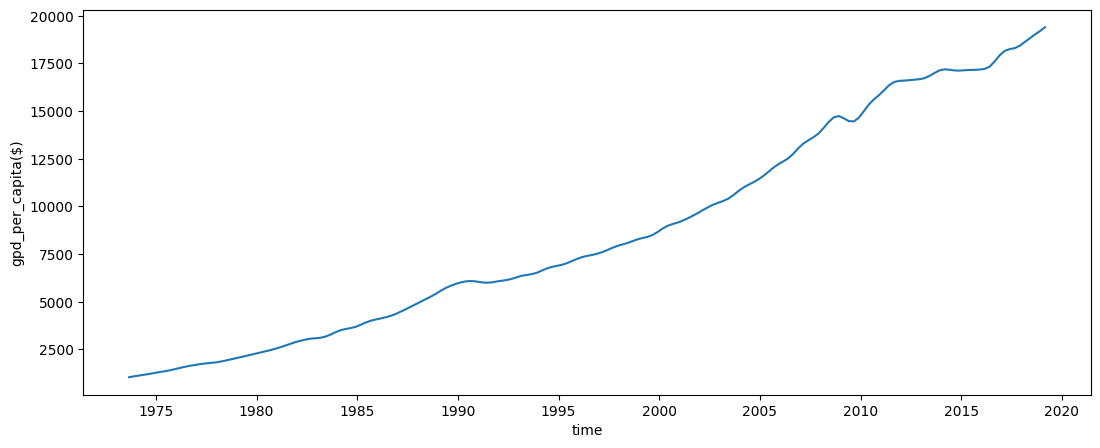

In [130]:
plt.figure(figsize=(13,5))
plt.plot(gpd_per_capita.index, gpd_per_capita)
plt.xlabel('time')
plt.ylabel('gpd_per_capita($)')
plt.show()

# Step 1: shift the gdp_capital_series to create y(t-1) series

In [140]:
# Step 1: shift the gdp_capital_series to create y(t-1) series
# 计算 QoQ 百分比变化的公式为 (current_value - previous_value) / previous_value
Y_t_shift = gpd_per_capita.shift(1)
# Step 2: compute the QoQ series
r_t = (gpd_per_capita-Y_t_shift)/Y_t_shift

# Put all together
gdp_data['gpd_per_capita($)-QoQ'] = r_t
gdp_data.head()

,Quarter,gpd_per_capita($),gpd($m),gpd_per_capita($)-QoQ
Quarter,,,,
1973-09-01,1973-09-01,1041,14115,NaN
1973-12-01,1973-12-01,1089,14831,0.046110
1974-03-01,1974-03-01,1128,15416,0.035813
1974-06-01,1974-06-01,1167,16015,0.034574
1974-09-01,1974-09-01,1213,16711,0.039417


In [141]:
gdp_data_Q1 = gdp_data[gdp_data.index.month == 3]
gdp_data_Q2 = gdp_data[gdp_data.index.month == 6]
gdp_data_Q3 = gdp_data[gdp_data.index.month == 9]
gdp_data_Q4 = gdp_data[gdp_data.index.month == 12]

In [142]:
print(gdp_data_Q1)

              Quarter  gpd_per_capita($)  gpd($m)  gpd_per_capita($)-QoQ
Quarter                                                                 
1974-03-01 1974-03-01               1128    15416               0.035813
1975-03-01 1975-03-01               1309    18144               0.035601
1976-03-01 1976-03-01               1520    21282               0.043240
1977-03-01 1977-03-01               1724    24397               0.024970
1978-03-01 1978-03-01               1853    26540               0.022063
1979-03-01 1979-03-01               2085    30179               0.029630
1980-03-01 1980-03-01               2331    34142               0.026420
1981-03-01 1981-03-01               2607    38757               0.030435
1982-03-01 1982-03-01               2949    44596               0.024670
1983-03-01 1983-03-01               3108    47679               0.008436
1984-03-01 1984-03-01               3504    54415               0.031195
1985-03-01 1985-03-01               3790    59627  

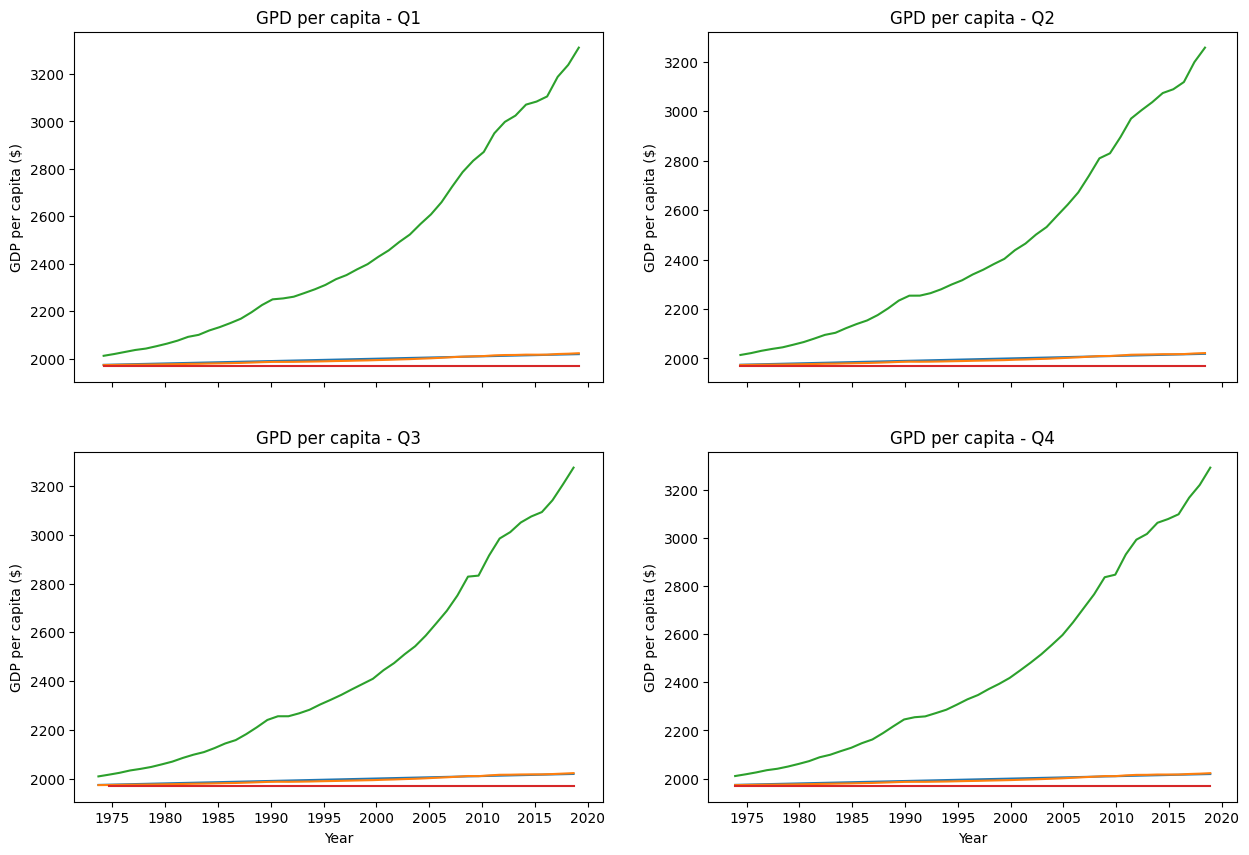

In [145]:
# Plot 2 time series in 2 sub plots
fig, ax = plt.subplots(2, 2, sharex=True,  figsize=(15, 10))
ax[0,0].plot(gdp_data_Q1.index,gdp_data_Q1)
ax[0,0].set_title('GPD per capita - Q1')
ax[0,0].set_ylabel('GDP per capita ($)')

ax[0,1].plot(gdp_data_Q2)
ax[0,1].set_title('GPD per capita - Q2')
ax[0,1].set_ylabel('GDP per capita ($)')

ax[1,0].plot(gdp_data_Q3)
ax[1,0].set_title('GPD per capita - Q3')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('GDP per capita ($)')

ax[1,1].plot(gdp_data_Q4)
ax[1,1].set_title('GPD per capita - Q4')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('GDP per capita ($)')

plt.show()